In [4]:
### Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
### Read the data

iris = pd.read_csv('iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [9]:
### check the number of rowas and columns
iris.shape

(150, 6)

In [10]:
### check the number of classes

iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

We see there are three classes. i.e three species: setosa, versicolor, virginica.
The datasamples are equally distributed among all the three classes (50 each)

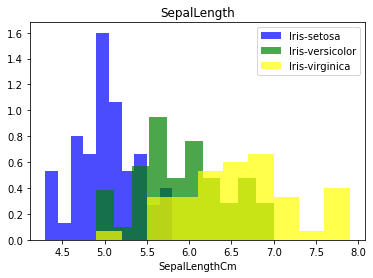

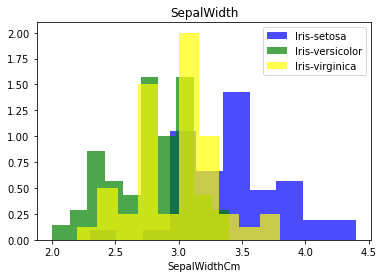

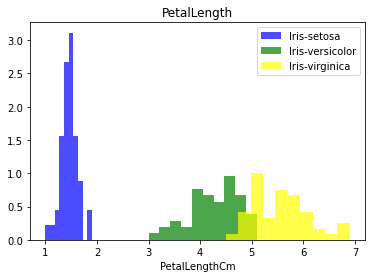

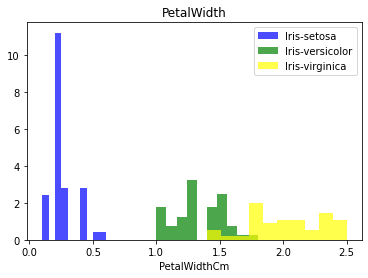

In [37]:
### Generate histograms of all three species w.r.t each columns
for column_name in iris.columns:
    if column_name != 'Id' and column_name != 'Species': #Excude the index and class columns
        plt.hist(iris[iris['Species']=='Iris-setosa'][column_name], color='blue', alpha=0.7, density=True)
        plt.hist(iris[iris['Species']=='Iris-versicolor'][column_name], color='green', alpha=0.7, density=True)
        plt.hist(iris[iris['Species']=='Iris-virginica'][column_name], color='yellow', alpha=0.7, density=True)
        
        plt.title(column_name.strip('Cm')) #Remove 'Cm' from column name
        plt.xlabel(column_name)
        plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
        plt.show()
        

We see a clear relation between petal length, petal width and the species. It seems that Setosa can be identified with lower petal length/width, Versicolor is identified with slightly higher petal length/width and the Viriginica is identified with the much higher petal width/length. 

## Data Preparation (Pre-processing)

In [41]:
### check for NULL values

iris.isnull().values.any()

False

#### Divide the Data into Train, Validate and Test Datasets

In [42]:
## divide the Data into train, valid, test

train, valid, test = np.split(iris.sample(frac=1), [int(0.6*len(iris)), int(0.8*len(iris))]) #Randomising data and then making 2 cuts at 60% and 80% of data

#### Scaling the Data

In [46]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Since there is not much imbalance in the data, scaling is not necessary in this case

#### Oversampling / Undersampling

In [51]:
### Libraries for Over Sampling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [52]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Since the datasamples are equally dsitributed among the classes, over/under sampling is not necsessary

In [53]:
### Function to create feature matrix and class vector

def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #over sampling
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1,1))))   
    
    return data, x, y

In [54]:
train, x_train, y_train = scale_dataset(train, oversample=False) # No Oversampling
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

## Classification 

In [55]:
# Importing Reporting Libraries (Common for all classifiers)
from sklearn.metrics import classification_report

### --- Using KNN Classifier ---

In [56]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=3) # Neighbours = 1
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Neighbours = 5
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### --- Using Naive Bayes ---

In [63]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [65]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



### --- Using Logistic Regression ---

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [71]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



### --- Using SVM (Support Vector Machines) ---

In [72]:
from sklearn.svm import SVC

In [73]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [74]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

